In [6]:
# ---------- IMPORT MODULES ----------
from get_city_graph import get_city_graph
from get_city_data_from_db import get_city_data_from_db
from store_city_to_db import store_city_to_db
from get_or_create_run_config import get_or_create_run_config
from create_iteration import create_iteration
from generate_vehicles import generate_vehicles
from generate_vehicle_routes import generate_vehicle_routes
from generate_congestion import generate_congestion
from plot_congestion_heatmap import plot_congestion_heatmap

# ---------- CONFIGURATION ----------
from sqlalchemy.orm import sessionmaker
from models import * #City, Node, Edge, RunConfig, Iteration, Vehicle, VehicleRoute, CongestionMap, RoutePoint  # adjust to your actual model imports


CITY_NAME = "Košice, Slovakia"
DIST_THRESH = 10
SPEED_DIFF_THRESH = 2
RUN_CONFIG_ID = 7
ITERATION_ID = 2

Session = sessionmaker(bind=engine)
session = Session()


city = session.query(City).filter_by(name=CITY_NAME).first()
_, edges = get_city_data_from_db(session, city.id)

In [7]:
# Step : Compute congestion
congestion_df = generate_congestion(
    session, CongestionMap,
    RUN_CONFIG_ID, ITERATION_ID,
    DIST_THRESH, SPEED_DIFF_THRESH
)

In [11]:
congestion_df.head(100)

,edge_id,congestion_score
0,3,0.997849
1,4,1.863169
2,6,4.850948
3,7,4.228174
4,8,6.000000
...,...,...
95,358,0.865164
96,361,5.102301
97,362,0.966201
98,364,5.790282


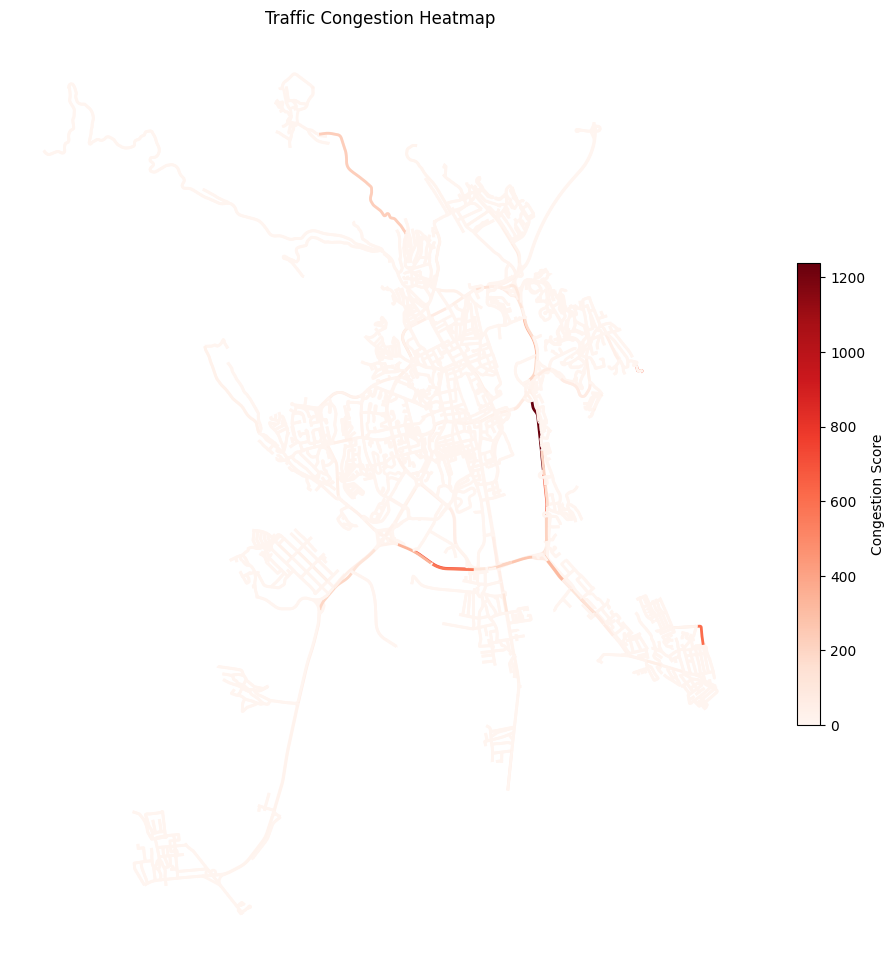

In [12]:
# Step : Plot heatmap
plot_congestion_heatmap(edges, congestion_df)